### EDA

In [1]:
import pandas as pd

# Load the dataset
df = pd.read_csv("emotion_dataset.csv")

# Display the first few rows
print(df.head())

                  time customer_id  emotion
0  2025-02-18 04:18:14    CUST0145  neutral
1  2025-02-13 23:44:00    CUST0473  neutral
2  2025-02-26 03:01:34    CUST0001  neutral
3  2025-02-24 15:54:48    CUST0643  neutral
4  2025-02-23 14:39:11    CUST0078  neutral


In [2]:
# Check the shape of the dataset
print(f"Dataset shape: {df.shape}")  # (rows, columns)

# Check column names and data types
print(df.info())

# Summary statistics for numerical columns (if any)
print(df.describe())

Dataset shape: (1000, 3)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   time         1000 non-null   object
 1   customer_id  1000 non-null   object
 2   emotion      1000 non-null   object
dtypes: object(3)
memory usage: 23.6+ KB
None
                       time customer_id  emotion
count                  1000        1000     1000
unique                 1000        1000        4
top     2025-02-28 21:54:52    CUST0564  neutral
freq                      1           1      488


In [3]:
# Check for missing values
print(df.isnull().sum())

# Handle missing values (if necessary)
# Example: Drop rows with missing values
df = df.dropna()

time           0
customer_id    0
emotion        0
dtype: int64


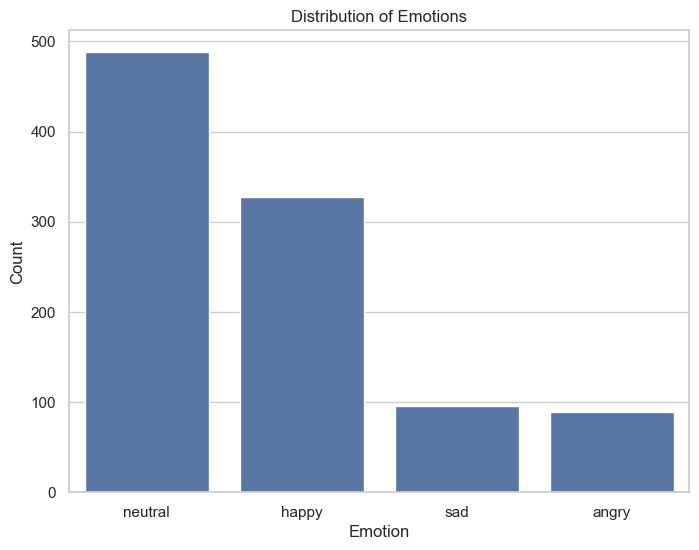

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style for plots
sns.set(style="whitegrid")

# Plot the distribution of emotions
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x="emotion", order=df["emotion"].value_counts().index)
plt.title("Distribution of Emotions")
plt.xlabel("Emotion")
plt.ylabel("Count")
plt.show()

<Figure size 1200x600 with 0 Axes>

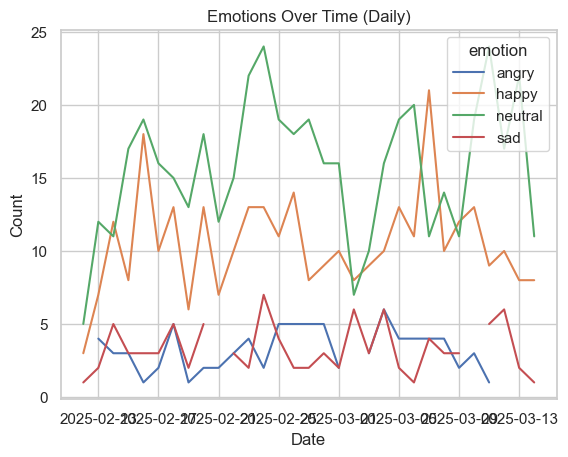

<Figure size 1200x600 with 0 Axes>

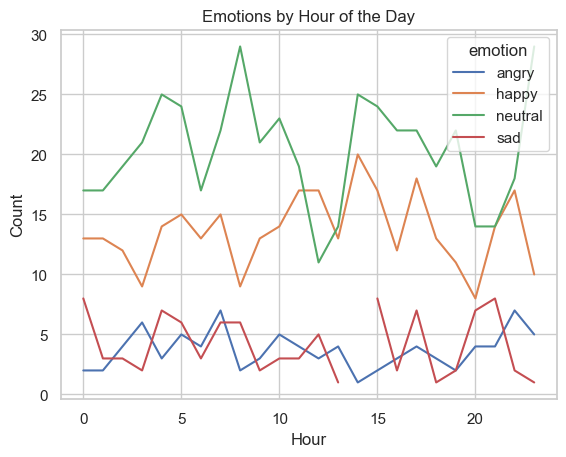

In [5]:
# Convert the 'time' column to datetime
df["time"] = pd.to_datetime(df["time"])

# Extract date and hour from the timestamp
df["date"] = df["time"].dt.date
df["hour"] = df["time"].dt.hour

# Plot emotions over time (daily)
plt.figure(figsize=(12, 6))
df.groupby(["date", "emotion"]).size().unstack().plot(kind="line")
plt.title("Emotions Over Time (Daily)")
plt.xlabel("Date")
plt.ylabel("Count")
plt.show()

# Plot emotions by hour of the day
plt.figure(figsize=(12, 6))
df.groupby(["hour", "emotion"]).size().unstack().plot(kind="line")
plt.title("Emotions by Hour of the Day")
plt.xlabel("Hour")
plt.ylabel("Count")
plt.show()

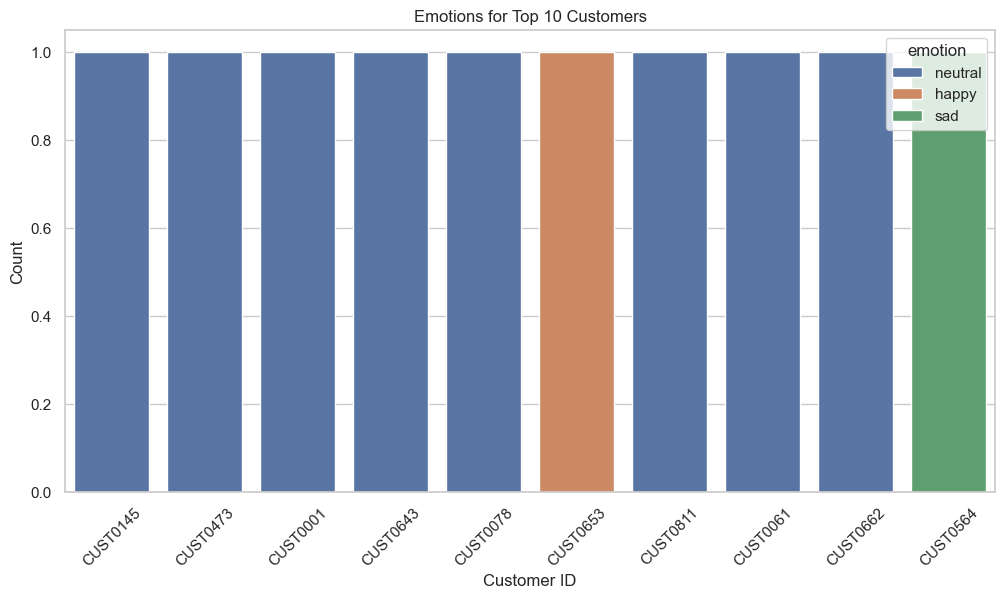

In [7]:
# Count of emotions per customer
customer_emotion_counts = df.groupby(["customer_id", "emotion"]).size().unstack()

# Plot top 10 customers with the most entries
top_customers = df["customer_id"].value_counts().nlargest(10).index
df_top = df[df["customer_id"].isin(top_customers)]

plt.figure(figsize=(12, 6))
sns.countplot(data=df_top, x="customer_id", hue="emotion")
plt.title("Emotions for Top 10 Customers")
plt.xlabel("Customer ID")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

### Customer Segmentation

### Time series analysis

In [8]:
# Convert 'time' to datetime (if not already done)
df["time"] = pd.to_datetime(df["time"])

# Aggregate by date and emotion
df["date"] = df["time"].dt.date
time_series = df.groupby(["date", "emotion"]).size().unstack(fill_value=0)

# Display the first few rows
print(time_series.head())

emotion     angry  happy  neutral  sad
date                                  
2025-02-12      0      3        5    1
2025-02-13      4      7       12    2
2025-02-14      3     12       11    5
2025-02-15      3      8       17    3
2025-02-16      1     18       19    3


<Figure size 1200x600 with 0 Axes>

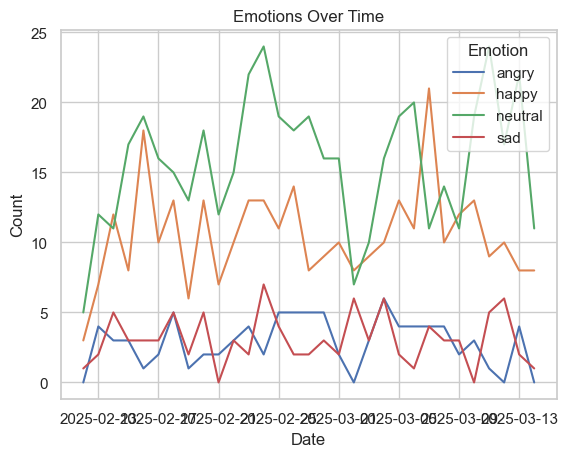

In [9]:
# Plot emotions over time
plt.figure(figsize=(12, 6))
time_series.plot(kind="line")
plt.title("Emotions Over Time")
plt.xlabel("Date")
plt.ylabel("Count")
plt.legend(title="Emotion")
plt.show()

<Figure size 1200x600 with 0 Axes>

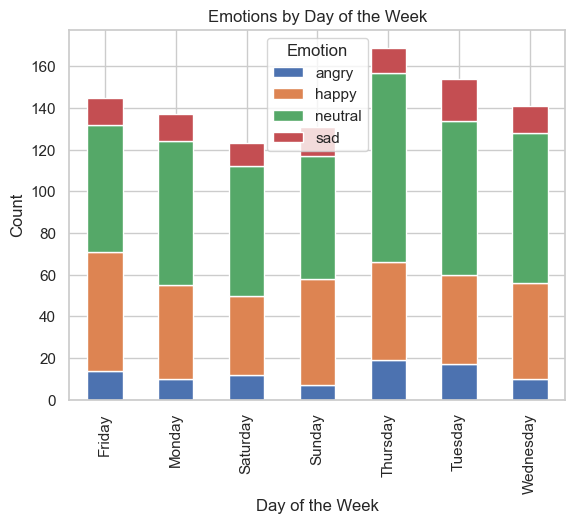

In [10]:
# Add day of the week to the dataset
df["day_of_week"] = df["time"].dt.day_name()

# Aggregate by day of the week and emotion
weekly_trends = df.groupby(["day_of_week", "emotion"]).size().unstack(fill_value=0)

# Plot weekly trends
plt.figure(figsize=(12, 6))
weekly_trends.plot(kind="bar", stacked=True)
plt.title("Emotions by Day of the Week")
plt.xlabel("Day of the Week")
plt.ylabel("Count")
plt.legend(title="Emotion")
plt.show()

<Figure size 1200x800 with 0 Axes>

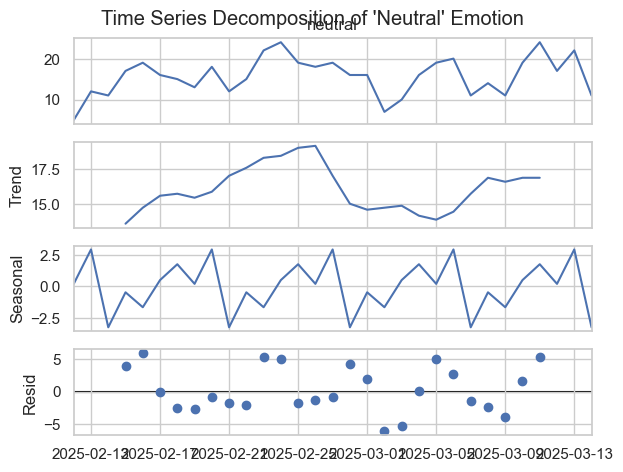

In [11]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Example: Decompose the 'neutral' emotion time series
neutral_series = time_series["neutral"]
decomposition = seasonal_decompose(neutral_series, period=7)  # Weekly seasonality

# Plot decomposition
plt.figure(figsize=(12, 8))
decomposition.plot()
plt.suptitle("Time Series Decomposition of 'Neutral' Emotion")
plt.show()

c:\Users\hp\OneDrive\Desktop\Emotion Detection\Program 2\myenv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\hp\OneDrive\Desktop\Emotion Detection\Program 2\myenv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\hp\OneDrive\Desktop\Emotion Detection\Program 2\myenv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


2025-03-15    13.529093
2025-03-16    14.601478
2025-03-17    15.056191
2025-03-18    15.248998
2025-03-19    15.330752
2025-03-20    15.365417
2025-03-21    15.380116
Freq: D, Name: predicted_mean, dtype: float64


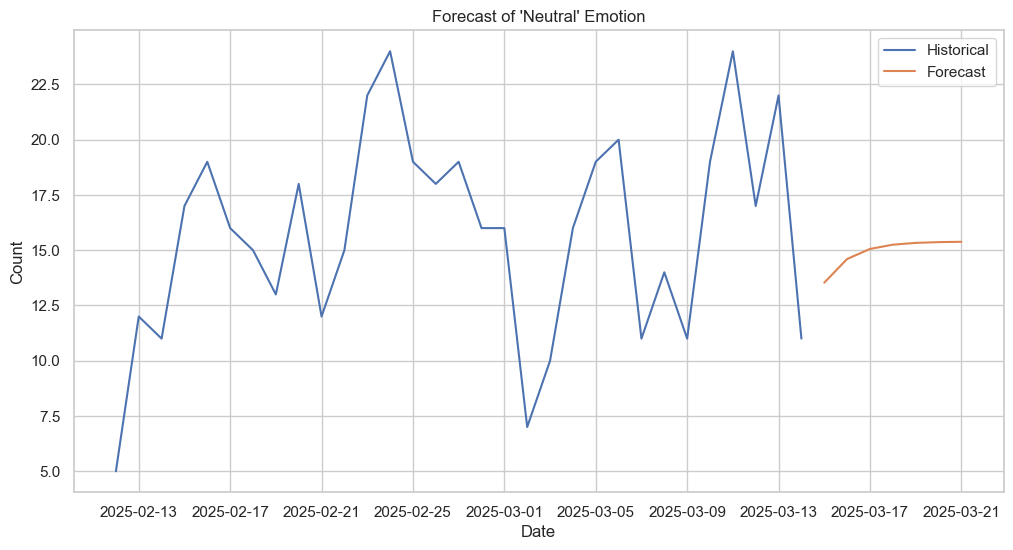

In [12]:
from statsmodels.tsa.arima.model import ARIMA

# Fit an ARIMA model (example for 'neutral' emotion)
model = ARIMA(neutral_series, order=(1, 1, 1))
results = model.fit()

# Forecast the next 7 days
forecast = results.forecast(steps=7)
print(forecast)

# Plot the forecast
plt.figure(figsize=(12, 6))
plt.plot(neutral_series, label="Historical")
plt.plot(forecast, label="Forecast")
plt.title("Forecast of 'Neutral' Emotion")
plt.xlabel("Date")
plt.ylabel("Count")
plt.legend()
plt.show()

### Test

In [2]:
pip list

Package           Version
----------------- -----------
asttokens         3.0.0
colorama          0.4.6
comm              0.2.2
contourpy         1.3.1
cycler            0.12.1
debugpy           1.8.12
decorator         5.1.1
executing         2.2.0
fonttools         4.55.8
ipykernel         6.29.5
ipython           8.32.0
jedi              0.19.2
jupyter_client    8.6.3
jupyter_core      5.7.2
kiwisolver        1.4.8
matplotlib        3.10.0
matplotlib-inline 0.1.7
nest-asyncio      1.6.0
numpy             2.2.2
packaging         24.2
pandas            2.2.3
parso             0.8.4
pillow            11.1.0
pip               25.0.1
platformdirs      4.3.6
prompt_toolkit    3.0.50
psutil            6.1.1
pure_eval         0.2.3
Pygments          2.19.1
pyparsing         3.2.1
python-dateutil   2.9.0.post0
pytz              2025.1
pywin32           308
pyzmq             26.2.1
seaborn           0.13.2
six               1.17.0
stack-data        0.6.3
tornado           6.4.2
traitlets     